On va essayer d'utiliser des techniques d'ensemble pour détecter les colonnes intéressantes :
- arbre de décision

**DPE classification**  
* Target : Etiquette_DPE
* Features :
* Type_bâtiment
* Zone_climatique_
* Type_énergie_principale_chauffage
* Qualité_isolation_enveloppe
* Qualité_isolation_menuiseries
* Qualité_isolation_murs
* Isolation_toiture_(0/1)
* Protection_solaire_exterieure_(0/1)



In [21]:
import pandas as pd
import unicodedata

# chargement des données
file_path = "../data/dpe-v2-logements-existants_Q4-24.csv"
df = pd.read_csv(file_path)

# Comptage des classes par "N°_région_(BAN)"
df['Classe_Hauteur'] = df['Hauteur_sous-plafond'].apply(
    lambda x: '≤2.6' if x <= 2.6 else '>2.6')
df['Classe_Surface'] = df['Surface_habitable_logement'].apply(
    lambda x: '≤50' if x <= 50 else '50-100' if 50 < x <= 100 else '100-150' if 100 < x <= 150 else '150-200' if 150 < x <= 200 else '200-250' if 200 < x <= 250 else '250-300' if 250 < x <= 300 else '300-350' if 300 < x <= 350 else '350-400' if 350 < x <= 400 else '>400' 
)

df['Type_énergie_climatisation'] = df['Type_énergie_climatisation'].fillna(
    "Pas de clim")

# un peu d'affichage
for id, value in enumerate(df.columns):
    print(value)
# print(df["Classe_Hauteur"])


print(df["Qualité_isolation_enveloppe"].unique())
print(df["Surface_climatisée"].unique())
print(df["Type_énergie_climatisation"].unique())

C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\2899187623.py:6: DtypeWarning: Columns (11,102,112,190,191,192,193,226,237) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


N°DPE
Date_réception_DPE
Date_établissement_DPE
Date_visite_diagnostiqueur
Modèle_DPE
N°_DPE_remplacé
Date_fin_validité_DPE
Version_DPE
N°_DPE_immeuble_associé
Appartement_non_visité_(0/1)
Méthode_application_DPE
N°_immatriculation_copropriété
Invariant_fiscal_logement
N°_RPLS_logement
Etiquette_GES
Etiquette_DPE
Année_construction
Type_bâtiment
Type_installation_chauffage
Type_installation_ECS_(général)
Période_construction
Hauteur_sous-plafond
Nombre_appartement
Nombre_niveau_immeuble
Nombre_niveau_logement
Surface_habitable_immeuble
Surface_habitable_logement
Surface_tertiaire_immeuble
Classe_inertie_bâtiment
Typologie_logement
Position_logement_dans_immeuble
Classe_altitude
Zone_climatique_
Adresse_brute
Nom__commune_(BAN)
Code_INSEE_(BAN)
N°_voie_(BAN)
Identifiant__BAN
Adresse_(BAN)
Code_postal_(BAN)
Score_BAN
Nom__rue_(BAN)
Coordonnée_cartographique_X_(BAN)
Coordonnée_cartographique_Y_(BAN)
Code_postal_(brut)
N°_étage_appartement
Nom_résidence
Complément_d'adresse_bâtiment
Cage_d

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


colonnes_a_garder = [
    "Type_énergie_climatisation",
    "Type_énergie_principale_ECS",
    "Type_énergie_n°1",
    "Type_bâtiment",
    "Classe_Surface",
    "Zone_climatique_",
    "Type_énergie_principale_chauffage",
    "Qualité_isolation_enveloppe",
    "Qualité_isolation_menuiseries",
    "Qualité_isolation_murs",
    "Qualité_isolation_plancher_bas",
    "Classe_inertie_bâtiment",
    "Logement_traversant_(0/1)",
    "Présence_brasseur_air_(0/1)",
    "Isolation_toiture_(0/1)",
    "Protection_solaire_exterieure_(0/1)",
    "Inertie_lourde_(0/1)",
    "N°_région_(BAN)",
    "Classe_Hauteur"
]

X = df[colonnes_a_garder]

y = df['Etiquette_DPE']

non_numeric_columns = X.select_dtypes(exclude=['number']).columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Entraîner un modèle
model = RandomForestClassifier()
model.fit(X, y)

# Afficher les importances des features
importances = pd.DataFrame(
    {'Feature': X.columns, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\202629630.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\202629630.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\202629630.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

                                Feature  Importance
17                      N°_région_(BAN)    0.126688
5                      Zone_climatique_    0.096214
4                        Classe_Surface    0.093661
8         Qualité_isolation_menuiseries    0.087670
10       Qualité_isolation_plancher_bas    0.082768
9                Qualité_isolation_murs    0.078606
7           Qualité_isolation_enveloppe    0.074775
11              Classe_inertie_bâtiment    0.061835
15  Protection_solaire_exterieure_(0/1)    0.046890
6     Type_énergie_principale_chauffage    0.040890
2                      Type_énergie_n°1    0.035723
1           Type_énergie_principale_ECS    0.034305
12            Logement_traversant_(0/1)    0.033212
18                       Classe_Hauteur    0.028590
14              Isolation_toiture_(0/1)    0.028265
0            Type_énergie_climatisation    0.024182
16                 Inertie_lourde_(0/1)    0.014734
13          Présence_brasseur_air_(0/1)    0.010993
3           

C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\4215689220.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\4215689220.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\4215689220.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Correspondance pour la colonne 'Type_énergie_climatisation':
   Label Encodé Classe Originale
0             0      Gaz naturel
1             1      Pas de clim
2             2      Électricité

Correspondance pour la colonne 'Type_énergie_principale_ECS':
    Label Encodé                         Classe Originale
0              0                            Bois – Bûches
1              1  Bois – Granulés (pellets) ou briquettes
2              2            Bois – Plaquettes d’industrie
3              3            Bois – Plaquettes forestières
4              4                                   Butane
5              5                                  Charbon
6              6                         Fioul domestique
7              7                                      GPL
8              8                              Gaz naturel
9              9                                  Propane
10            10               Réseau de Chauffage urbain
11            11                                

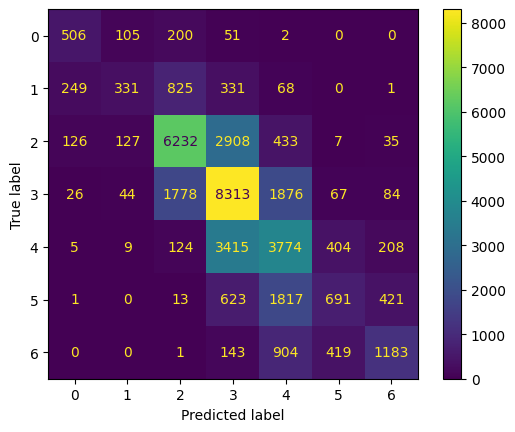

In [35]:
# essayons de voir si le classifieur fonctionne sur ces données
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np

colonnes_a_garder = [
    "Type_énergie_climatisation",
    "Type_énergie_principale_ECS",
    "Type_énergie_n°1",
    "Classe_Surface",
    "Zone_climatique_",
    "Type_énergie_principale_chauffage",
    "Qualité_isolation_enveloppe",
    "Qualité_isolation_menuiseries",
    "Qualité_isolation_murs",
    "Qualité_isolation_plancher_bas",
    "Classe_inertie_bâtiment",
    "Logement_traversant_(0/1)",
    "Isolation_toiture_(0/1)",
    "Protection_solaire_exterieure_(0/1)",
    "N°_région_(BAN)",
    "Classe_Hauteur"
]


X_label = df[colonnes_a_garder]
X = df[colonnes_a_garder]
y = df['Etiquette_DPE']

non_numeric_columns = X.select_dtypes(exclude=['number']).columns
label_encoder = LabelEncoder()
label_encoders = {}
column_mappings = {}

for col in non_numeric_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col].astype(str))

    # Stocker la correspondance dans un DataFrame
    mapping = pd.DataFrame({
        'Label Encodé': range(len(label_encoders[col].classes_)),
        'Classe Originale': label_encoders[col].classes_
    })
    column_mappings[col] = mapping

# Afficher toutes les correspondances pour chaque colonne
for col, mapping in column_mappings.items():
    print(f"Correspondance pour la colonne '{col}':")
    print(mapping)
    print()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10)
rf_classifier.fit(X_train, y_train)
print(rf_classifier.score(X_train, y_train))
print(rf_classifier.score(X_test, y_test))

# Prédictions sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm)
disp.plot(cmap="viridis")

In [54]:
import shap

# on va essayer shap pour expliquer le modèle avec shap
# Prédiction initiale
# Sélectionner une ligne spécifique du DataFrame pour SHAP
ligne_test = X_test.iloc[100]

# Prédiction pour cette ligne
predicted_class = rf_classifier.predict([ligne_test])[0]
print(f"\nClasse prédite : {predicted_class}")
print(f"\nClasse réelle : {y_test.iloc[100]}")

# Stocker les décisions de chaque arbre
probas = rf_classifier.predict_proba([ligne_test])

# Afficher les probabilités
print("Probabilités pour chaque classe :")
for classe, proba in zip(rf_classifier.classes_, probas[0]):
    print(f"Classe {classe} : {proba:.4f}")


# # Explicabilité avec SHAP
# explainer = shap.TreeExplainer(rf_classifier)

# # Calculer les valeurs SHAP
# shap_values = explainer.shap_values(ligne_test)

# # Vérifier les structures
# print("\nExpected value pour chaque classe :", explainer.expected_value)
# print("SHAP values shape (une par classe) :", np.shape(shap_values))

# # Identifier l'indice de la classe prédite dans les classes du modèle
# class_index = list(rf_classifier.classes_).index(predicted_class)

# shap_values_for_predicted_class = shap_values[class_index]

# print(shap_values_for_predicted_class)


Classe prédite : D

Classe réelle : E
Probabilités pour chaque classe :
Classe A : 0.0001
Classe B : 0.0090
Classe C : 0.1444
Classe D : 0.3037
Classe E : 0.2701
Classe F : 0.1504
Classe G : 0.1223


c:\mesprojets\BGDIA706_DPE\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\mesprojets\BGDIA706_DPE\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [36]:
decoder = {}

for col, mapping in column_mappings.items():
    # Créer un sous-dictionnaire pour chaque colonne
    decoder[col] = dict(zip(mapping['Label Encodé'],
                        mapping['Classe Originale']))

# Fonction pour décoder un label encodé


def decode_label(column, encoded_label):
    if column not in decoder:
        raise ValueError(
            f"La colonne '{column}' n'existe pas dans le décodeur.")
    if encoded_label not in decoder[column]:
        raise ValueError(
            f"Le label encodé '{encoded_label}' n'existe pas pour la colonne '{column}'.")
    return decoder[column][encoded_label]

In [55]:
# on va agir sur chaque paramètre pour voir si ça améliore le DPE
ligne_test_label = pd.DataFrame(index=[0])

for col in non_numeric_columns:
    ligne_test_label[col] = decode_label(col, int(ligne_test[col]))


ligne_test["Qualité_isolation_enveloppe"] = 3
ligne_test_label["Qualité_isolation_enveloppe"] = "très bonne"

# Prédiction pour cette ligne
predicted_class = rf_classifier.predict([ligne_test])[0]
print(f"\nClasse prédite : {predicted_class}")
print(f"\nClasse réelle : {y_test.iloc[100]}")

# Stocker les décisions de chaque arbre
probas = rf_classifier.predict_proba([ligne_test])

# Afficher les probabilités
print("Probabilités pour chaque classe :")
for classe, proba in zip(rf_classifier.classes_, probas[0]):
    print(f"Classe {classe} : {proba:.4f}")


Classe prédite : C

Classe réelle : E
Probabilités pour chaque classe :
Classe A : 0.0057
Classe B : 0.1068
Classe C : 0.3286
Classe D : 0.2847
Classe E : 0.1878
Classe F : 0.0567
Classe G : 0.0298


C:\Users\Laury\AppData\Local\Temp\ipykernel_5200\3888732920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligne_test["Qualité_isolation_enveloppe"] = 3
c:\mesprojets\BGDIA706_DPE\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\mesprojets\BGDIA706_DPE\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
